In [1]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [2]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
x_metric = "planning_budget"
tags = ['2024-03-16-17-36-26']
filters = {"tags": {"$in": tags}}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [3]:
# crete a dataframe from runs and summary metrics

data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

df


100%|██████████| 72/72 [00:00<00:00, 254.62it/s]


,Self_Play/Timesteps,Training/Policy_loss,Self_Play/Discounted_Returns,Self_Play/Mean_Timesteps,_step,Self_Play/Mean_Entropy,_timestamp,Training/Value_loss,Self_Play/Min_Return,Self_Play/Max_Return,...,policy_loss_weight,sample_batch_ratio,tree_value_transform,observation_embedding,regularization_weight,root_selection_policy,episodes_per_iteration,tree_evaluation_policy,replay_buffer_multiplier,selection_value_transform
0,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1.134837,"{'_type': 'histogram', 'bins': [-0.5, -0.48437...",150.000000,19,0.843530,1.710615e+09,0.008367,0,0,...,0.3,1,identity,coordinate,0.0001,PolicyPUCT,6,mvc,10,identity
1,"{'bins': [147, 147.046875, 147.09375, 147.1406...",1.174523,"{'_type': 'histogram', 'bins': [0, 0.000818141...",149.500000,19,0.858275,1.710614e+09,0.006075,0,1,...,0.3,1,identity,coordinate,0.0001,PUCT,6,mvc,10,identity
2,"{'bins': [62, 63.375, 64.75, 66.125, 67.5, 68....",1.202213,"{'_type': 'histogram', 'bins': [0, 0.004556288...",123.666667,19,0.861684,1.710614e+09,0.008628,0,1,...,0.3,1,identity,coordinate,0.0001,PUCT,6,visit,10,identity
3,"{'_type': 'histogram', 'bins': [149.5, 149.515...",1.262796,"{'_type': 'histogram', 'bins': [-0.5, -0.48437...",150.000000,19,0.822383,1.710613e+09,0.008620,0,0,...,0.3,1,identity,coordinate,0.0001,PolicyPUCT,6,mvc,10,identity
4,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",1.267597,"{'_type': 'histogram', 'bins': [-0.5, -0.48437...",150.000000,19,0.836619,1.710613e+09,0.010998,0,0,...,0.3,1,identity,coordinate,0.0001,PUCT,6,mvc,10,identity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.679530,"{'bins': [62, 62.671875, 63.34375, 64.015625, ...",94.833333,19,0.435547,1.710607e+09,43.695407,62,105,...,0.3,1,identity,default,0.0001,PUCT,6,visit,10,identity
68,"{'_type': 'histogram', 'bins': [9, 9.03125, 9....",0.694206,"{'_type': 'histogram', 'bins': [9, 9.03125, 9....",10.333333,19,0.432093,1.710607e+09,7.202913,9,11,...,0.3,1,identity,default,0.0001,PUCT,6,mvc,10,identity
69,"{'_type': 'histogram', 'bins': [17, 17.9375, 1...",0.706058,"{'_type': 'histogram', 'bins': [17, 17.9375, 1...",34.166667,19,0.563712,1.710607e+09,7.579397,17,77,...,0.3,1,identity,default,0.0001,PUCT,6,visit,10,identity
70,"{'_type': 'histogram', 'bins': [109, 111.21875...",0.672775,"{'_type': 'histogram', 'bins': [109, 111.21875...",146.500000,19,0.051040,1.710609e+09,81.119511,109,251,...,0.3,1,identity,default,0.0001,PolicyPUCT,6,mvc,10,identity


In [4]:
df.env_params

0     {'id': 'FrozenLake-v1', 'desc': None, 'map_nam...
1     {'id': 'FrozenLake-v1', 'desc': None, 'map_nam...
2     {'id': 'FrozenLake-v1', 'desc': None, 'map_nam...
3     {'id': 'FrozenLake-v1', 'desc': None, 'map_nam...
4     {'id': 'FrozenLake-v1', 'desc': None, 'map_nam...
                            ...                        
67    {'id': 'CartPole-v1', 'max_episode_steps': 100...
68    {'id': 'CartPole-v1', 'max_episode_steps': 100...
69    {'id': 'CartPole-v1', 'max_episode_steps': 100...
70    {'id': 'CartPole-v1', 'max_episode_steps': 100...
71    {'id': 'CartPole-v1', 'max_episode_steps': 100...
Name: env_params, Length: 72, dtype: object

In [5]:
df.columns

Index(['Self_Play/Timesteps', 'Training/Policy_loss',
       'Self_Play/Discounted_Returns', 'Self_Play/Mean_Timesteps', '_step',
       'Self_Play/Mean_Entropy', '_timestamp', 'Training/Value_loss',
       'Self_Play/Min_Return', 'Self_Play/Max_Return',
       'Self_Play/Mean_Discounted_Returns', 'Self_Play/Mean_Return',
       'Training/Regularization_loss', 'Training/Replay_Buffer_Size',
       'Training/Learning_Rate', 'Training/Value_Simularities',
       'Training/Value_and_Policy_loss', 'Self_Play/Total_Timesteps',
       'Self_Play/Cumulative_Return', 'Self_Play/Returns', '_wandb',
       '_runtime', 'Self_Play/Min_Timesteps', 'Self_Play/Entropies',
       'Self_Play/EMA_Return', 'environment_steps', 'grad_steps',
       'Self_Play/Total_Mean_Return', 'episodes', 'ncols', 'layers', 'puct_c',
       'workers', 'lr_gamma', 'dir_alpha', 'env_params', 'eval_param',
       'hidden_dim', 'iterations', 'model_type', 'norm_layer', 'dir_epsilon',
       'activation_fn', 'learning_rate',

In [6]:
save_folder = 'outfiles'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

In [7]:
df.env_description.unique()

array(['FrozenLake-v1-8x8', 'FrozenLake-v1-4x4', 'CliffWalking-v0',
       'CartPole-v1'], dtype=object)

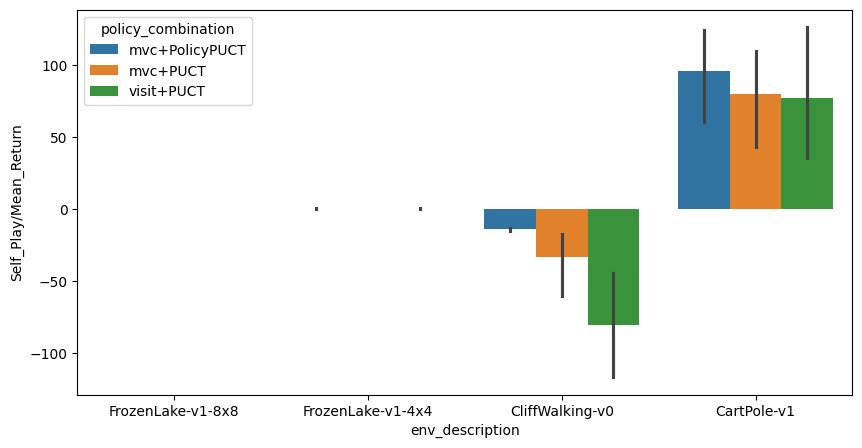

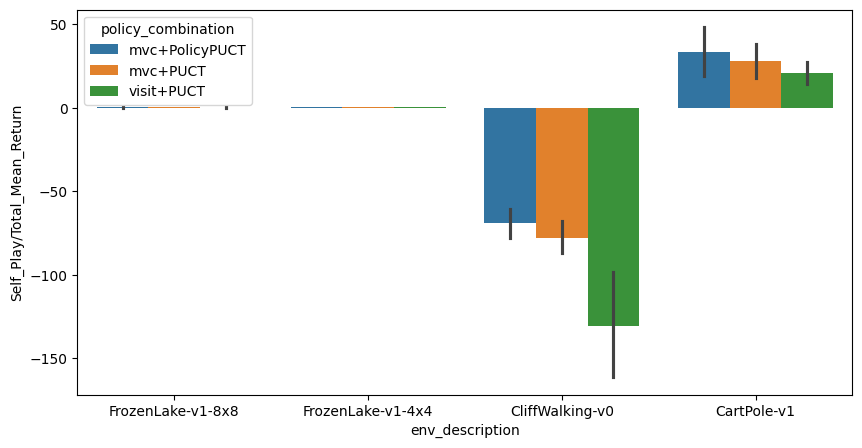

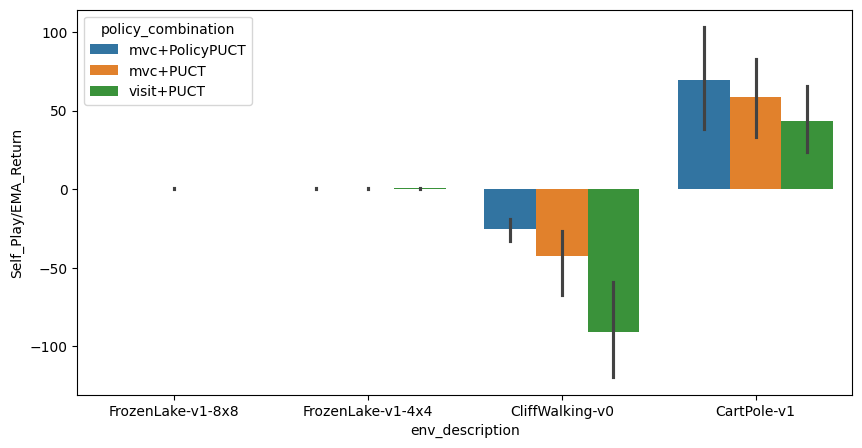

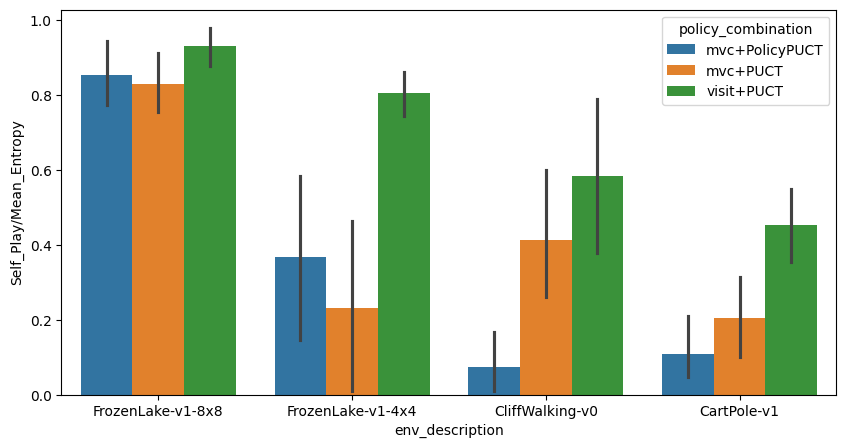

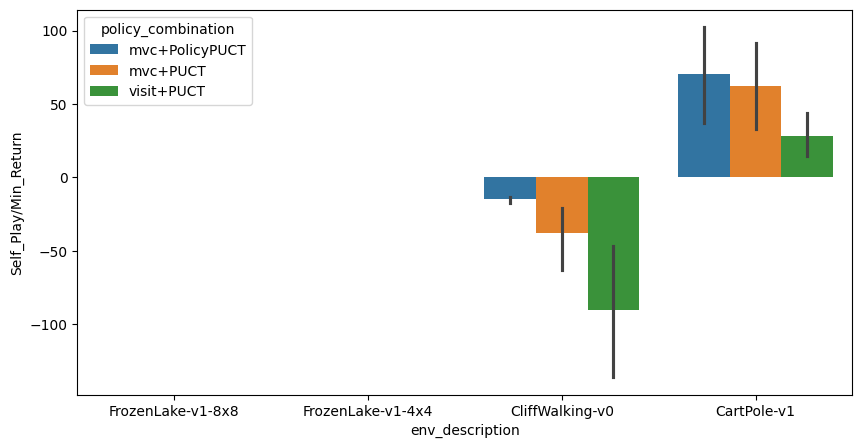

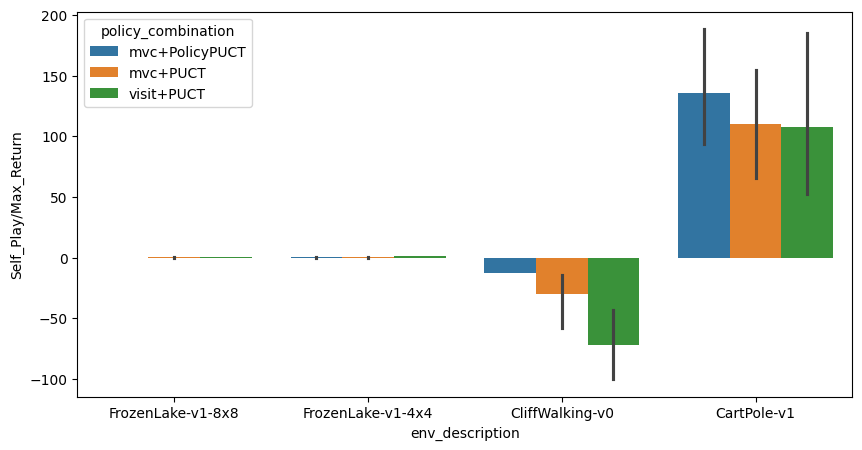

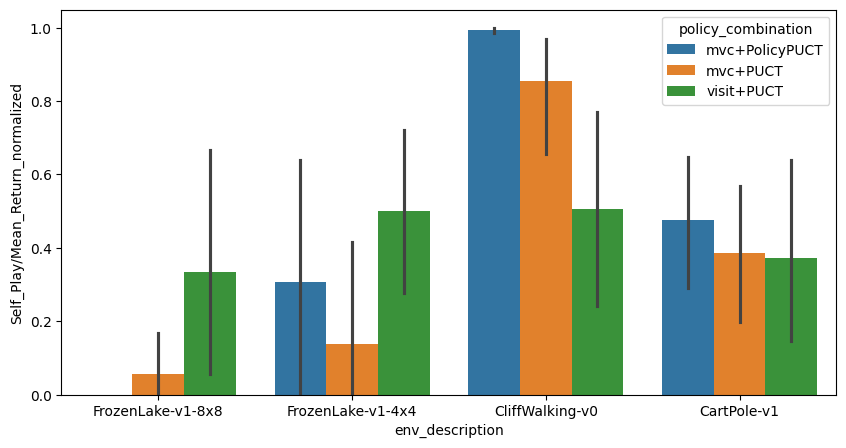

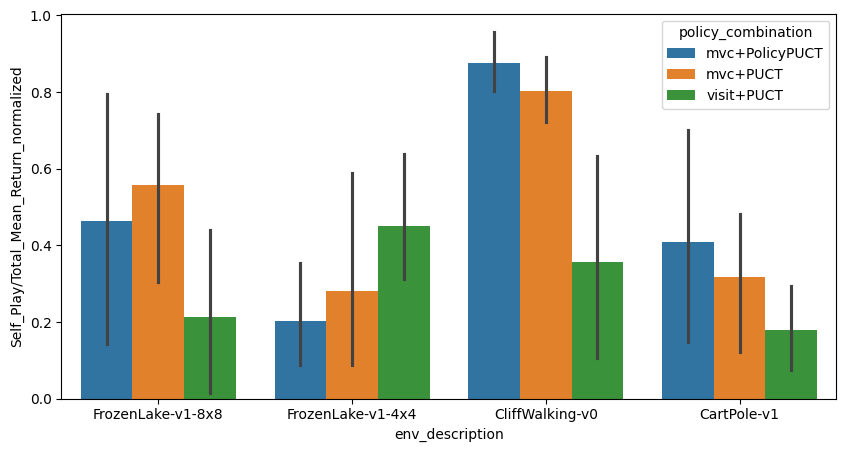

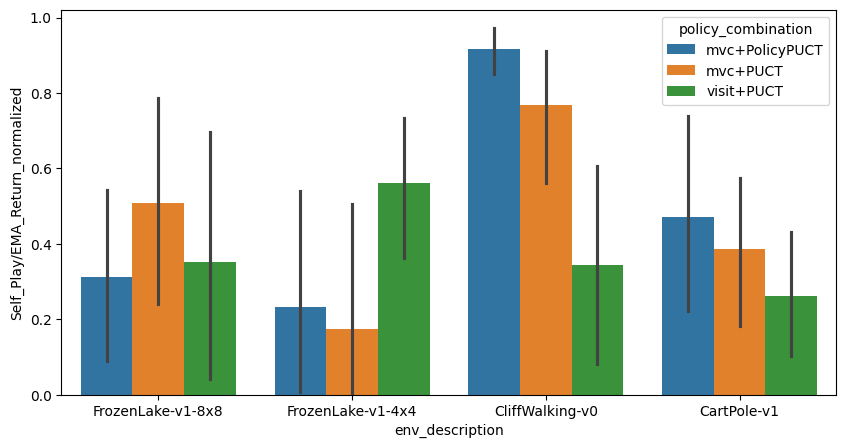

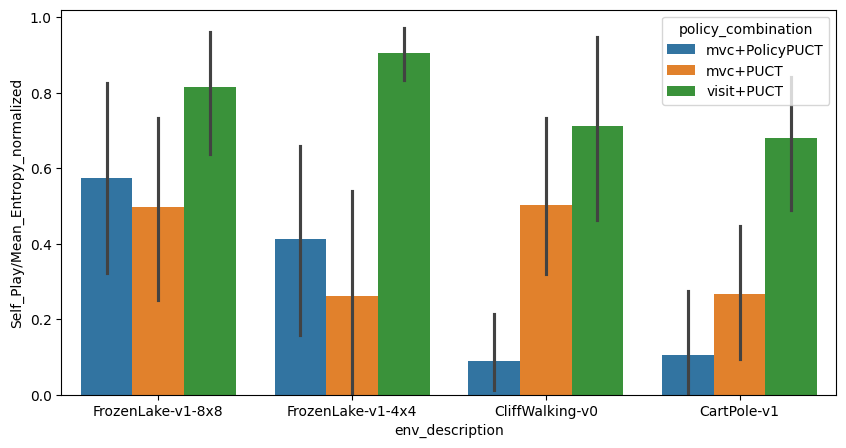

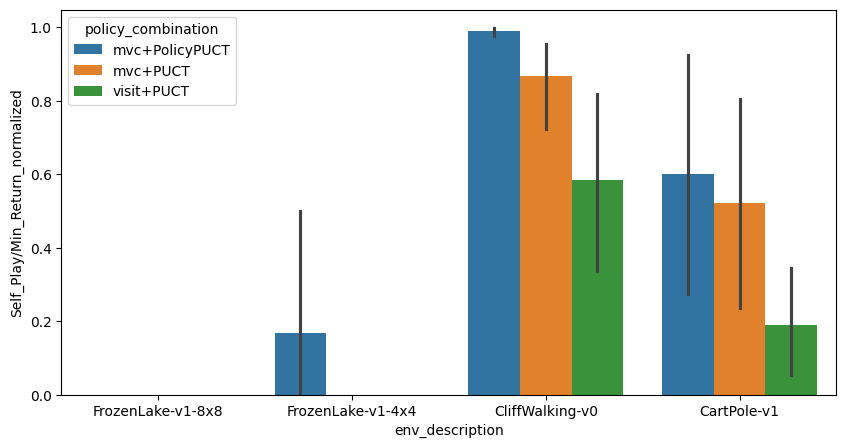

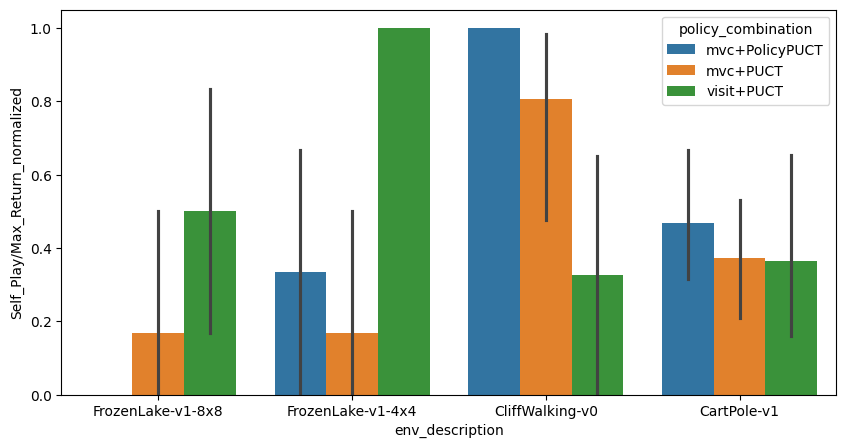

In [8]:


df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']



metrics = ['Self_Play/Mean_Return', "Self_Play/Total_Mean_Return", "Self_Play/EMA_Return", 'Self_Play/Mean_Entropy', 'Self_Play/Min_Return',
           'Self_Play/Max_Return',
        #    'max_Self_Play/Mean_Return', 'max_Self_Play/Mean_Return_step'
           ]

def normalize(series):
    return (series - series.min()) / (series.max() - series.min())
# Apply normalization to each metric within each env_description group
for metric in metrics:
    df[f'{metric}_normalized'] = df.groupby('env_description')[metric].transform(normalize)

# min_max_returns = {
#     'FrozenLake-v1-8x8-100-20': {'min': 0, 'max': 1},
#     'FrozenLake-v1-4x4-100-20': {'min': 0, 'max': 1},
#     'CliffWalking-v0-100-15': {'min': -150, 'max': -13},
#     'CartPole-v1-300-30': {'min': 0, 'max': 300},
#     # Add other environments as needed
# }

# # Function to normalize a value
# def normalize(value, min_val, max_val):
#     return (value - min_val) / (max_val - min_val)

# Apply normalization for each metric
for metric in metrics:
    # Apply normalization based on the min and max returns for each env_description
    # df[metric + '_normalized'] = df.groupby('env_description')[metric].transform(lambda x: normalize(x, min_max_returns[x.name]['min'], min_max_returns[x.name]['max']))
    df[f'{metric}_normalized'] = df.groupby('env_description')[metric].transform(normalize)


normalized_metrics = [f'{metric}_normalized' for metric in metrics]

estimator = "mean"
bar_groups = 'env_description'
group = 'policy_combination'
for metric in metrics + normalized_metrics:
    # sns.set_theme(style="darkgrid")

    sns.barplot(data=df, x=bar_groups, y=metric, hue=group, estimator=estimator)
    # make wider
    plt.gcf().set_size_inches(10, 5)

    # save as pdf
    # plt.savefig(f'{save_folder}/{name_fn(metric).replace(" ", "_")}_by_policy_{estimator}.pdf')

    # Show the plot
    plt.show()
